In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# Pré-processamento dos dados

### 1. Checa tamanho das imagens

In [2]:
def check_images_size(directory):
    for main_folder in ['Test']:
        path = os.path.join(directory, main_folder)
        for i, fastfood in enumerate(os.listdir(path)):
            fastfood_path = os.path.join(path, fastfood)

            for image in os.listdir(fastfood_path):
                image_path = os.path.join(fastfood_path, image)
                img = cv2.imread(image_path)
                img_size = img.shape
                print(img_size)
                if i == 10: break

In [3]:
check_images_size('FastFoodClassificationV2')

(275, 183, 3)
(194, 259, 3)
(100, 100, 3)
(194, 259, 3)
(168, 300, 3)
(275, 183, 3)
(100, 100, 3)
(194, 259, 3)
(225, 225, 3)
(195, 258, 3)
(190, 265, 3)
(225, 225, 3)
(259, 195, 3)
(190, 266, 3)
(225, 225, 3)
(243, 207, 3)
(275, 183, 3)
(100, 100, 3)
(168, 300, 3)
(231, 218, 3)
(183, 275, 3)
(168, 300, 3)
(203, 249, 3)
(163, 310, 3)
(100, 100, 3)
(225, 225, 3)
(225, 225, 3)
(100, 100, 3)
(100, 100, 3)
(251, 201, 3)
(100, 100, 3)
(266, 190, 3)
(168, 300, 3)
(225, 225, 3)
(194, 259, 3)
(183, 275, 3)
(275, 183, 3)
(183, 275, 3)
(202, 250, 3)
(183, 275, 3)
(233, 216, 3)
(249, 203, 3)
(183, 276, 3)
(207, 244, 3)
(275, 183, 3)
(183, 275, 3)
(233, 216, 3)
(225, 225, 3)
(224, 225, 3)
(218, 231, 3)
(183, 275, 3)
(275, 183, 3)
(275, 183, 3)
(198, 254, 3)
(225, 225, 3)
(168, 300, 3)
(183, 275, 3)
(225, 225, 3)
(225, 225, 3)
(100, 100, 3)
(241, 210, 3)
(193, 262, 3)
(100, 100, 3)
(225, 225, 3)
(194, 259, 3)
(176, 286, 3)
(268, 188, 3)
(275, 183, 3)
(164, 220, 3)
(4652, 3101, 3)
(322, 156, 3)
(176

- Percebe-se que as imagens são de tamanhos bem variados, o que é uma característica própria do DataSet.
- Logo, não há necessidade de ajustar nenhuma imagem quanto a isso.

### 2. Visualiza a distribuição das classes

In [4]:
def class_distribution(directory):
    fig, axes = plt.subplots(1, 3, figsize=(15, 45))
    for i, main_folder in enumerate(['Test', 'Train', 'Valid']):
        food = []
        sizes = []
        main_path = os.path.join(directory, main_folder)
        for fastfood in os.listdir(main_path):
            food.append(fastfood)
            sizes.append(len(os.listdir(os.path.join(main_path, fastfood))))
        axes[i].pie(sizes, labels=food, autopct='%1.1f%%')
        axes[i].set_title(f"Distribuição em {main_folder}")
    plt.style.use('default')
    plt.tight_layout()
    plt.show()

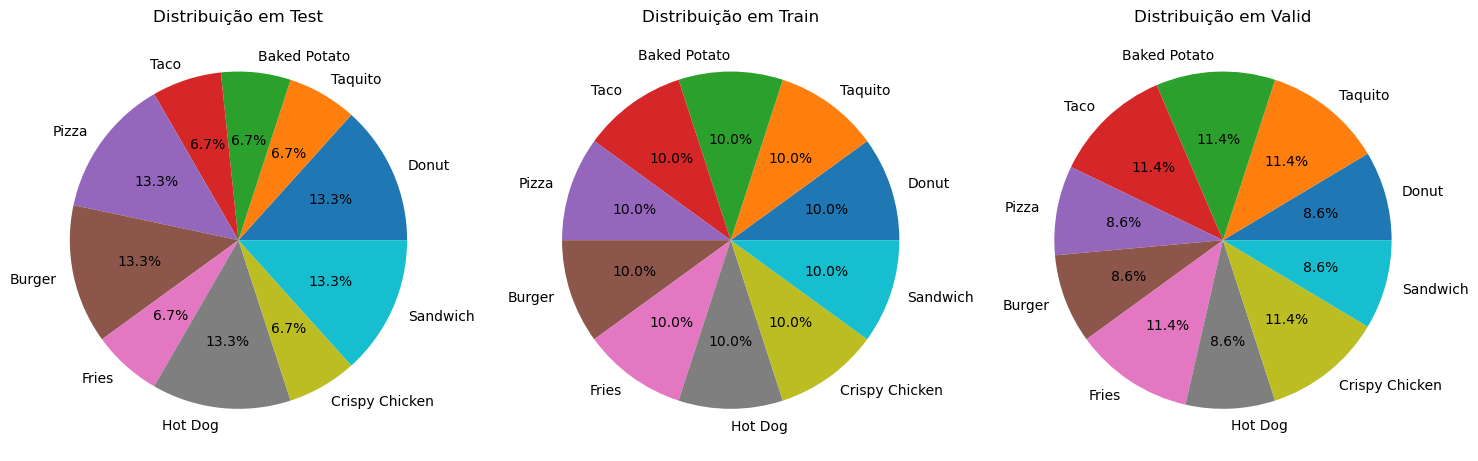

In [15]:
class_distribution('/FastFoodClassification/Fast Food Classification V2')

- Está tudo conforme indicado nas especificações do DataSet.

### 3. Converte imagens PNG no modo Pallete para RGBA.

In [6]:
def convert_to_rgba_images(directory):
    for main_folder in ['Test', 'Train', 'Valid']:
        path = os.path.join(directory, main_folder)
        for i, fastfood in enumerate(os.listdir(path)):
            fastfood_path = os.path.join(path, fastfood)

            for image in os.listdir(fastfood_path):
                image_path = os.path.join(fastfood_path, image)
                img = Image.open(image_path)
            if img.mode == 'P':
                print(f"{image} is not rgba")
                # if img.format == 'PNG':
                    # img = img.convert('RGBA')
                    # img.save(image_path)

In [7]:
convert_to_rgba_images('/FastFoodClassification/Fast Food Classification V2')

### 4. Checa se todas as imagens estão no formato ideal (png ou jpeg)

In [8]:
def images_format(directory):
    total_jpg = 0
    total_png = 0
    total_others = 0
    for main_folder in ['Test', 'Train', 'Valid']:
        path = os.path.join(directory, main_folder)
        jpg = 0
        png = 0
        others = 0
        for food in os.listdir(path):
            food_path = os.path.join(path, food)
            for image in os.listdir(food_path):
                image_path = os.path.join(food_path, image)
                format = os.path.splitext(image_path)
                if format[1] in [".jpg", ".jpeg"]:
                    jpg += 1
                    total_jpg +=1
                elif format[1] == ".png":
                    png += 1
                    total_png +=1
                else:
                    others += 1
                    total_others += 1 
        print(f'{main_folder}\njpg = {jpg}\npng = {png}\nothers={others}\n')
    print(f'Total\njpg = {total_jpg}\npng = {total_png}\nothers={total_others}')

In [14]:
images_format('/FastFoodClassification/Fast Food Classification V2')

Test
jpg = 1497
png = 3
others=0

Train
jpg = 14966
png = 34
others=0

Valid
jpg = 3500
png = 0
others=0

Total
jpg = 19963
png = 37
others=0


- Verifica-se que foi bem sucedido, todas as imagens estão no formato ideal.

### 5. Verifica a existência de imagens duplicadas

In [10]:
def duplicate_images(directory):
    for main_folder in ['Test', 'Train', 'Valid']:
        path = os.path.join(directory, main_folder)
        for fastfood in os.listdir(path):
            fastfood_path = os.path.join(path, fastfood)
            images = []

            for image in os.listdir(fastfood_path):
                # print('imagem atual: ', image)
                image_path = os.path.join(fastfood_path, image)
                img = cv2.imread(image_path)
                for image1 in images:
                    image1_path = os.path.join(fastfood_path, image1)
                    img1 = cv2.imread(image1_path)
                    if np.array_equal(img, img1) and image_path!=image1_path:
                        print(f"{image} = {image1}")
                        # os.remove(image1_path)
                        # images.remove(image1)
                        break
                images.append(image)

In [11]:
# duplicate_images('/FastFoodClassification/Fast Food Classification V2')

- Foram constatadas algumas imagens duplicadas, mas foram apagadas do DataSet para a modelagem

#### Visualização do dataset depois de excluir as duplicatas.

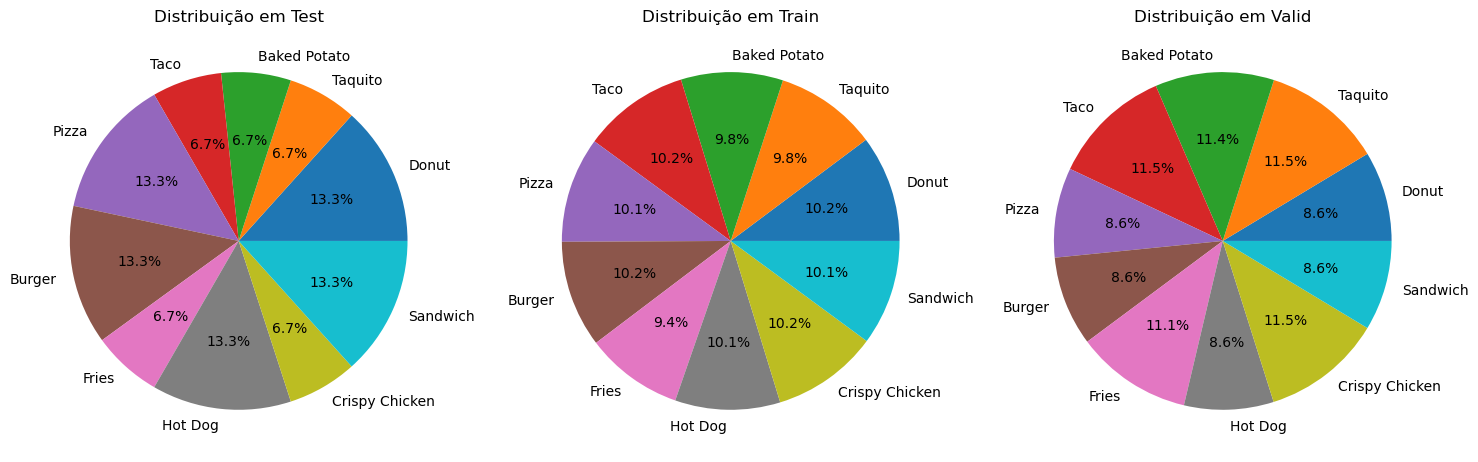

In [12]:
class_distribution('FastFoodClassificationV2')

In [13]:
images_format('FastFoodClassificationV2')

Test
jpg = 1497
png = 3
others=0

Train
jpg = 14516
png = 33
others=0

Valid
jpg = 3478
png = 0
others=0

Total
jpg = 19491
png = 36
others=0


- Depois de apagar as imagens duplicadas, o Dataset permaneceu nos conformes.